In [8]:
import numpy as np
import talib
import pandas as pd

close = np.random.random(100)

In [9]:
output = talib.SMA(close)

In [10]:
type(close)

numpy.ndarray

In [11]:
output

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan, 0.42000298,
       0.42620438, 0.41716499, 0.39771481, 0.39792625, 0.42388979,
       0.4382143 , 0.43852767, 0.42354585, 0.40485153, 0.42670158,
       0.43180173, 0.46192163, 0.45406395, 0.45055399, 0.45104028,
       0.44858804, 0.44139656, 0.46716204, 0.48277818, 0.49961805,
       0.51110534, 0.52570483, 0.52300704, 0.50372825, 0.5052303 ,
       0.52882126, 0.51861965, 0.50689851, 0.51871505, 0.52313179,
       0.50366015, 0.5169718 , 0.53427039, 0.52783723, 0.49748989,
       0.49249508, 0.49265197, 0.48668343, 0.50320101, 0.4978911 ,
       0.49890483, 0.47348578, 0.46941708, 0.48527555, 0.49611

In [12]:
new_f100 = pd.read_csv('f100_1070904.csv')

In [13]:
new_f100.head()

,Block,Time (UTC),year,month,date,timestamp,Amount (BTC),Balance (BTC),Balance (USD),USD price,address,rank
0,539868,2018-09-04T02:08:47Z,2018,9,4,20180904,-46.977579,16396.821990,119371727.0,7280.17,1NDyJtNTjmwk5xPNhjgAMu4HDHigtobu1s,67
1,539866,2018-09-04T02:02:10Z,2018,9,4,20180904,56.183107,16443.799569,119713732.0,7280.17,1NDyJtNTjmwk5xPNhjgAMu4HDHigtobu1s,67
2,539864,2018-09-04T01:56:26Z,2018,9,4,20180904,-42.178551,16387.616462,119304709.0,7280.17,1NDyJtNTjmwk5xPNhjgAMu4HDHigtobu1s,67
3,539863,2018-09-04T01:48:06Z,2018,9,4,20180904,10.000000,20494.871931,149206246.0,7280.17,3FiMKffg2kY2Pi2Kebn2HZqN7m6kEcNUMk,62
4,539863,2018-09-04T01:48:06Z,2018,9,4,20180904,26.736498,16429.795013,119611776.0,7280.17,1NDyJtNTjmwk5xPNhjgAMu4HDHigtobu1s,67


In [14]:
v = np.array(new_f100['Amount (BTC)'],dtype='float')

In [15]:
type(v)

numpy.ndarray

In [46]:
print(v.shape)

(59065,)


In [17]:
rsi = talib.RSI(v, timeperiod=3)

In [18]:
print(v[:15])
print(rsi[:15])

[ -46.97757887   56.18310652  -42.17855079   10.           26.73649817
 -171.7819713   -11.0522336   -13.19518407   48.15524893   55.26441922
   12.55260443  -28.1860207    -9.71287341  -25.7459673    14.62041753]
[        nan         nan         nan 61.22928226 64.7203489  24.8726256
 57.01450098 56.53081289 68.13844797 69.55169441 49.68921447 35.27614504
 45.94168067 37.82674673 62.70508989]


In [19]:
import matplotlib.pyplot as plt

In [50]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, optional, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (`sharex`) or y (`sharey`)
        axes:
    
            - True or 'all': x- or y-axis will be shared among all
              subplots.
            - False or 'none': each subplot x- or y-axis will be
              independent.
            - 'row': each subplot row will share an x- or y-axis.
            - 'col': each subplot column will share an x- or y-axis.
    
        Whe

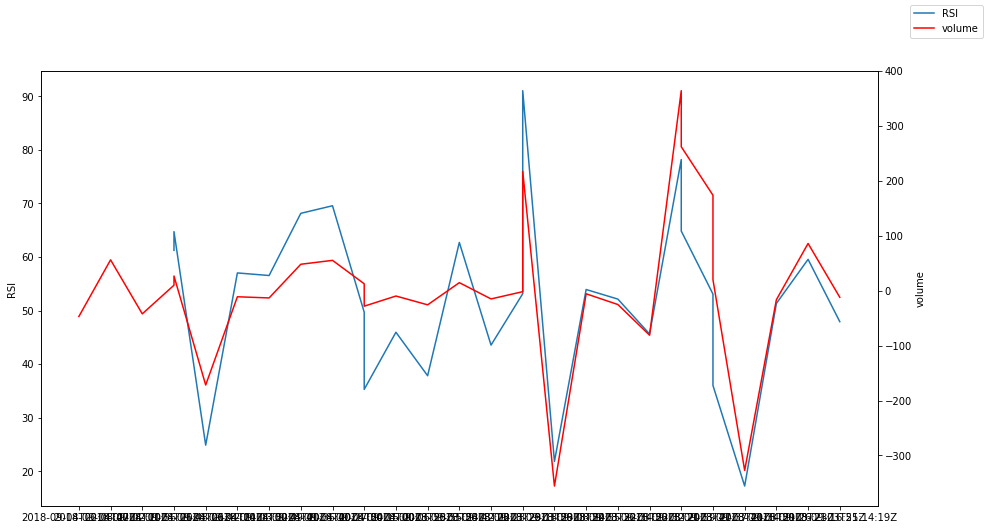

In [54]:
x = new_f100['Time (UTC)'][:30]
y1 = rsi[:30]
y2 = v[:30]

fig, ax1 = plt.subplots(figsize=(15,8))
# plt.plot(v)

ax1.plot(x, y1, label='RSI')
ax1.set_ylabel('RSI')

ax2 = ax1.twinx()  # this is the important function
ax2.plot(x, y2, 'r', label='volume')
# ax2.set_xlim([0, np.e])
ax2.set_ylabel('volume')
ax2.set_xlabel('Same X for both exp(-x) and ln(x)')

fig.legend()

In [56]:
new_f100.columns

Index(['Block', 'Time (UTC)', 'year', 'month', 'date', 'timestamp',
       'Amount (BTC)', 'Balance (BTC)', 'Balance (USD)', 'USD price',
       'address', 'rank'],
      dtype='object')

In [58]:
new_f100.drop(['Balance (BTC)', 'Balance (USD)', 'address'], axis = 1, inplace = True)

In [61]:
volume = np.array(new_f100['Amount (BTC)'],dtype='float')

In [64]:
help(talib.RSI)

Help on function RSI in module talib._ta_lib:

RSI(...)
    RSI(real[, timeperiod=?])
    
    Relative Strength Index (Momentum Indicators)
    
    Inputs:
        real: (any ndarray)
    Parameters:
        timeperiod: 14
    Outputs:
        real



In [126]:
talib.RSI(volume, timeperiod=15)

array([        nan,         nan,         nan, ..., 76.24291628,
       46.35409027, 52.69720385])

In [66]:
new_f100['RSI (3 days)'] = talib.RSI(volume, timeperiod=3)

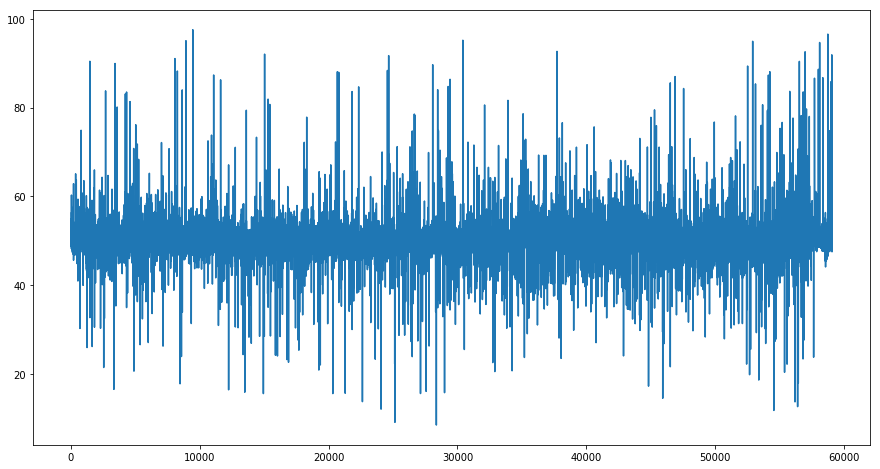

In [140]:
plt.figure(figsize=(15,8))
plt.plot(talib.RSI(np.array(new_f100['Amount (BTC)'],dtype='float'), timeperiod=30), '-')

In [73]:
new_f100.drop('RSI (3 days)', axis = 1, inplace = True)

In [79]:
pd.DataFrame(new_f100.groupby(['timestamp']).sum()['Amount (BTC)']).head()

,Amount (BTC)
timestamp,
20100724,10400.000000
20110301,79956.000000
20110604,0.001000
20110808,10770.515208
20120622,0.031337


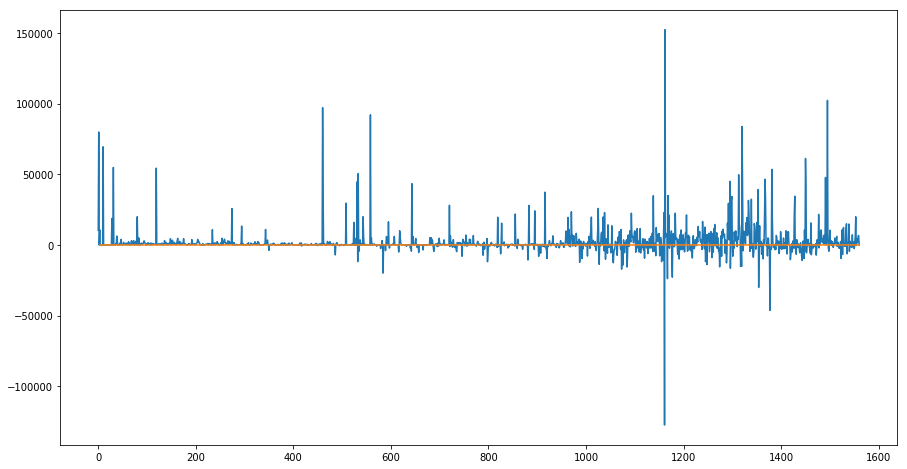

In [98]:
volume_day = new_f100.groupby(['timestamp']).sum()['Amount (BTC)']
plt.figure(figsize=(15,8))
plt.plot(np.array(volume_day))
plt.plot(talib.RSI(np.array(volume_day), timeperiod=3))

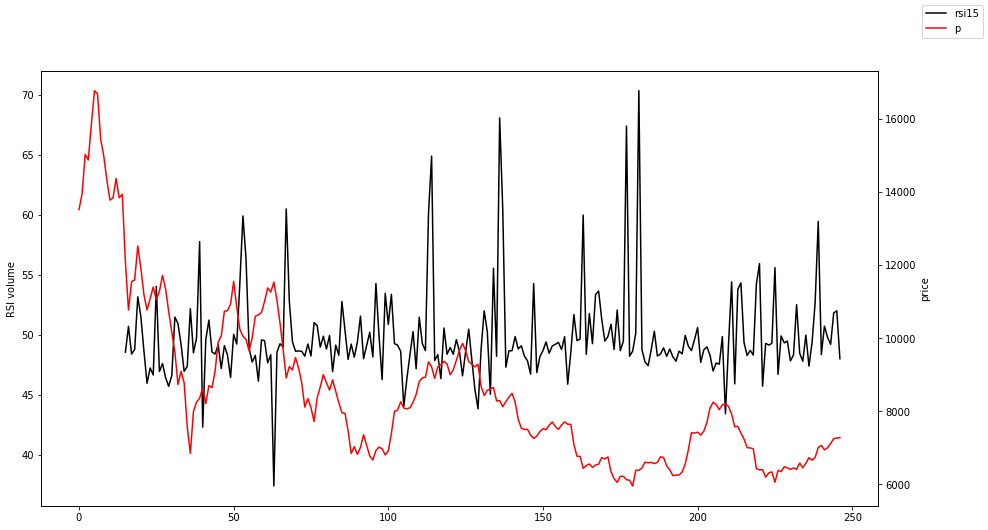

In [125]:
filtered = new_f100[new_f100['timestamp']>20180000].groupby(['timestamp'])
volume_day = filtered.sum()['Amount (BTC)']
# x = volume_day.index
# y1 = np.array(volume_day)
# rsi3 = talib.RSI(np.array(volume_day), timeperiod=3)
# rsi7 = talib.RSI(np.array(volume_day), timeperiod=7)
rsi15 = talib.RSI(np.array(volume_day), timeperiod=15)
price = np.array(filtered.mean()['USD price'])

fig, ax1 = plt.subplots(figsize=(15,8))
# plt.plot(v)

# ax1.plot(rsi3, label='rsi3', color = 'g')
# ax1.plot(rsi7, label='rsi7', color = 'y')
ax1.plot(rsi15, label='rsi15', color = 'k')
ax1.set_ylabel('RSI volume')

ax2 = ax1.twinx()  # this is the important function
ax2.plot(y3, label='p', color = 'r')
# ax2.set_xlim([0, np.e])
ax2.set_ylabel('price')
ax2.set_xlabel('Same X for both exp(-x) and ln(x)')

fig.legend()

In [141]:
df_day = new_f100.groupby(['timestamp'])
volume_day = np.array(df_day.sum()['Amount (BTC)'])
price_day = np.array(df_day.mean()['USD price'])

In [161]:
t = str(list(df_day.groups.keys())[0])
print(t[:4]+'-'+t[4:6]+'-'+t[6:]+'T00:00:00Z')

2010-07-24T00:00:00Z


In [167]:
raw_date = list(df_day.groups.keys())
def f(x):
    t = str(x)
    return t[:4]+'-'+t[4:6]+'-'+t[6:]+'T00:00:00Z'
es_date = list(map(f, list(df_day.groups.keys())))
es_date[:5]

['2010-07-24T00:00:00Z',
 '2011-03-01T00:00:00Z',
 '2011-06-04T00:00:00Z',
 '2011-08-08T00:00:00Z',
 '2012-06-22T00:00:00Z']

In [168]:
rsi6 = talib.RSI(volume_day, timeperiod=6)
rsi9 = talib.RSI(volume_day, timeperiod=9)
rsi15 = talib.RSI(volume_day, timeperiod=15)

In [179]:
t = pd.DataFrame(data = {'es_date':es_date, 'raw_date':raw_date, 'btc_volume':volume_day, 'btc_price':price_day, 
                         'RSI_6':rsi6, 'RSI_9':rsi9, 'RSI_15':rsi15})

In [193]:
def technical(df):
    import numpy as np
    import talib
    import pandas as pd
    df_day = df.groupby(['timestamp'])
    volume_day = np.array(df_day.sum()['Amount (BTC)'])
    price_day = np.array(df_day.mean()['USD price'])
    raw_date = list(df_day.groups.keys())
    
    def iso_format(x):
        t = str(x)
        return t[:4]+'-'+t[4:6]+'-'+t[6:]+'T00:00:00Z'
    
    es_date = list(map(iso_format, list(df_day.groups.keys())))
    rsi6 = talib.RSI(volume_day, timeperiod=6)
    rsi9 = talib.RSI(volume_day, timeperiod=9)
    rsi15 = talib.RSI(volume_day, timeperiod=15)
    
    df_technical = pd.DataFrame(data = {'es_date':es_date, 'raw_date':raw_date, 'btc_volume':volume_day, 'btc_price':price_day, 
                         'RSI_6':rsi6, 'RSI_9':rsi9, 'RSI_15':rsi15})
    return df_technical

In [170]:
help(pd.DataFrame)

Help on class DataFrame in module pandas.core.frame:

class DataFrame(pandas.core.generic.NDFrame)
 |  Two-dimensional size-mutable, potentially heterogeneous tabular data
 |  structure with labeled axes (rows and columns). Arithmetic operations
 |  align on both row and column labels. Can be thought of as a dict-like
 |  container for Series objects. The primary pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : numpy ndarray (structured or homogeneous), dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects
 |  
 |      .. versionchanged :: 0.23.0
 |         If data is a dict, argument order is maintained for Python 3.6
 |         and later.
 |  
 |  index : Index or array-like
 |      Index to use for resulting frame. Will default to RangeIndex if
 |      no indexing information part of input data and no index provided
 |  columns : Index or array-like
 |      Column labels to use for resulting frame. Will default to
 |      Ran

In [184]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561 entries, 0 to 1560
Data columns (total 7 columns):
es_date       1561 non-null object
raw_date      1561 non-null int64
btc_volume    1561 non-null float64
btc_price     1561 non-null float64
RSI_6         1555 non-null float64
RSI_9         1552 non-null float64
RSI_15        1546 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 85.4+ KB


In [186]:
t.to_csv('rsi_t.csv', index=False)

In [194]:
technical(new_f100)

,es_date,raw_date,btc_volume,btc_price,RSI_6,RSI_9,RSI_15
0,2010-07-24T00:00:00Z,20100724,1.040000e+04,0.053000,NaN,NaN,NaN
1,2011-03-01T00:00:00Z,20110301,7.995600e+04,0.930000,NaN,NaN,NaN
2,2011-06-04T00:00:00Z,20110604,1.000000e-03,17.830000,NaN,NaN,NaN
3,2011-08-08T00:00:00Z,20110808,1.077052e+04,8.890000,NaN,NaN,NaN
4,2012-06-22T00:00:00Z,20120622,3.133700e-02,6.490000,NaN,NaN,NaN
5,2012-07-15T00:00:00Z,20120715,1.093011e+00,8.090000,NaN,NaN,NaN
6,2012-10-23T00:00:00Z,20121023,3.905200e-02,11.650000,46.960056,NaN,NaN
7,2013-01-25T00:00:00Z,20130125,1.000000e-03,17.170000,46.960043,NaN,NaN
8,2013-02-01T00:00:00Z,20130201,1.435570e+01,20.030000,46.966452,NaN,NaN
9,2013-02-03T00:00:00Z,20130203,7.760000e-06,20.120000,46.959642,46.960555,NaN
